<a href="https://colab.research.google.com/github/jcollaor/Estadistica-con-R/blob/master/ML_TAREA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
import statistics
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
#Selección de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression,f_classif

#Modelos
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Preprocesamiento del dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Evaluación modelo
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# **Obtener Datos**




In [154]:
ruta = '/content/sample_data/startup_data.csv'

df_data = pd.read_csv(ruta , sep=',')


In [155]:
df_data.columns = ["sin_nombre_0",
"codigo_de_estado", 
"latitud",
"longitud", 
"codigo_postal", 
"id" ,
"ciudad", 
"direccion",
"nombre",
"etiquetas",
"fundado_en",
"cerrado_en",
"primera_financiacion_en", 
"ultima_financiacion_en" ,
"edad_primer_año_de_financiamiento", 
"edad_ultimo_año_de_financiamiento",
"edad_primer_hito_ano", 
"edad_ultimo_hito_ano", 
"relaciones", 
"rondas_de_financiacion", 
"financiamiento_total_usd", 
"hitos", 
"codigo_de_estado_1", 
"CA",
"NY",
"MA", 
"TX", 
"es_otro_estado", 
"codigo_de_categoria",
"es_software",
"es_web",
"es_movil",
"es_empresa",
"es_publicidad",
"es_gamesvideo",
"es_comercio_electronico",
"es_biotecnologia",
"es_consultora",
"es_otra_categoria",
"object_id",
"tiene_VC",
"tiene_angel",
"tiene_roundA", 
"tiene_roundB", 
"tiene_roundC", 
"tiene_roundD", 
"participantes_promedio", 
"es_top500", 
"estado"] 

# **Exploración**

In [132]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sin_nombre_0                       923 non-null    int64  
 1   codigo_de_estado                   923 non-null    object 
 2   latitud                            923 non-null    float64
 3   longitud                           923 non-null    float64
 4   codigo_postal                      923 non-null    object 
 5   id                                 923 non-null    object 
 6   ciudad                             923 non-null    object 
 7   direccion                          430 non-null    object 
 8   nombre                             923 non-null    object 
 9   etiquetas                          923 non-null    int64  
 10  fundado_en                         923 non-null    object 
 11  cerrado_en                         335 non-null    object 

In [156]:
df_data.describe()

,sin_nombre_0,latitud,longitud,etiquetas,edad_primer_año_de_financiamiento,edad_ultimo_año_de_financiamiento,edad_primer_hito_ano,edad_ultimo_hito_ano,relaciones,rondas_de_financiacion,...,es_consultora,es_otra_categoria,tiene_VC,tiene_angel,tiene_roundA,tiene_roundB,tiene_roundC,tiene_roundD,participantes_promedio,es_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [134]:
df_data.head(10)

,sin_nombre_0,codigo_de_estado,latitud,longitud,codigo_postal,id,ciudad,direccion,nombre,etiquetas,...,object_id,tiene_VC,tiene_angel,tiene_roundA,tiene_roundB,tiene_roundC,tiene_roundD,participantes_promedio,es_top500,estado
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


# **Análisis de datos**

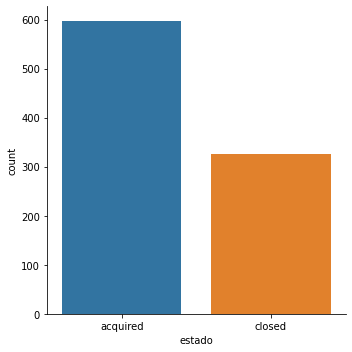

In [135]:
sb.factorplot('estado',data=df_data,kind="count")

# **Datos Faltantes**

In [157]:
total = df_data.isnull().sum().sort_values(ascending= False ) 
percent_1 = df_data.isnull().sum()/df_data.isnull().count()*100 
percent_2 = (round(percent_1, 1) ).sort_values(ascending= False ) 
datos_faltantes = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) 
datos_faltantes.head()

,Total,%
cerrado_en,588,63.7
direccion,493,53.4
edad_ultimo_hito_ano,152,16.5
edad_primer_hito_ano,152,16.5
codigo_de_estado_1,1,0.1


In [158]:
na_values = ('np.nan', 'NA', 'NaN' 'inf')
train = df_data.replace(na_values,np.nan)
nan_rows = train[df_data.isnull().any(1)]
nan_rows

olumn_with_nan = df_data.columns[df_data.isnull().any()]
numeric_shape = df_data.shape



In [159]:
for dataset in df_data:
    mean = df_data["edad_primer_hito_ano"].mean()
    std = df_data["edad_primer_hito_ano"].std()
    is_null = df_data["edad_primer_hito_ano"].isnull().sum()
     # calcula números aleatorios entre la media, estándar yes_null 
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # llena los valores de NaN en la columna Edad con valores 
    age_slice = df_data["edad_primer_hito_ano"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df_data["edad_primer_hito_ano"] = age_slice
    df_data["edad_primer_hito_ano"] = df_data["edad_primer_hito_ano"].astype(int)

In [160]:
for dataset in df_data:
    mean = df_data["edad_ultimo_hito_ano"].mean()
    std = df_data["edad_ultimo_hito_ano"].std()
    is_null = df_data["edad_ultimo_hito_ano"].isnull().sum()
     # calcula números aleatorios entre la media, estándar yes_null 
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # llena los valores de NaN en la columna Edad con valores 
    age_slice = df_data["edad_ultimo_hito_ano"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df_data["edad_ultimo_hito_ano"] = age_slice
    df_data["edad_ultimo_hito_ano"] = df_data["edad_ultimo_hito_ano"].astype(int)

In [161]:
common_value = '1/1/2090'
df_data['cerrado_en'] = df_data['cerrado_en'].fillna(common_value)

In [162]:
df_data["codigo_de_estado_1"] =df_data["codigo_de_estado"]

In [163]:
df_data['estado'] = df_data.estado.map({'acquired':1, 'closed':0})

In [164]:
total = df_data.isnull().sum().sort_values(ascending= False ) 
percent_1 = df_data.isnull().sum()/df_data.isnull().count()*100 
percent_2 = (round(percent_1, 1) ).sort_values(ascending= False ) 
datos_faltantes = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) 
datos_faltantes.head()

,Total,%
direccion,493,53.4
sin_nombre_0,0,0.0
es_consultora,0,0.0
es_otro_estado,0,0.0
codigo_de_categoria,0,0.0


In [165]:
#eliminar
df_data = df_data.drop(['direccion'], axis=1) 
df_data = df_data.drop(['codigo_de_estado','codigo_de_categoria','object_id'],axis=1)
df_data = df_data.drop(['codigo_postal','fundado_en','cerrado_en','primera_financiacion_en','ultima_financiacion_en','ciudad','nombre'],axis=1)
df_data = df_data.drop(['sin_nombre_0'],axis=1)
df_data = df_data.drop(['latitud','longitud'],axis=1)

In [166]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 923 non-null    object 
 1   etiquetas                          923 non-null    int64  
 2   edad_primer_año_de_financiamiento  923 non-null    float64
 3   edad_ultimo_año_de_financiamiento  923 non-null    float64
 4   edad_primer_hito_ano               923 non-null    int64  
 5   edad_ultimo_hito_ano               923 non-null    int64  
 6   relaciones                         923 non-null    int64  
 7   rondas_de_financiacion             923 non-null    int64  
 8   financiamiento_total_usd           923 non-null    int64  
 9   hitos                              923 non-null    int64  
 10  codigo_de_estado_1                 923 non-null    object 
 11  CA                                 923 non-null    int64  

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [167]:
df_data['edad_primer_hito_ano'] = df_data.edad_primer_hito_ano.astype(float)
df_data['edad_ultimo_hito_ano'] = df_data.edad_ultimo_hito_ano.astype(float)                                                                

In [168]:
df_data = pd.get_dummies(df_data)
df_data

,etiquetas,edad_primer_año_de_financiamiento,edad_ultimo_año_de_financiamiento,edad_primer_hito_ano,edad_ultimo_hito_ano,relaciones,rondas_de_financiacion,financiamiento_total_usd,hitos,CA,...,codigo_de_estado_1_OR,codigo_de_estado_1_PA,codigo_de_estado_1_RI,codigo_de_estado_1_TN,codigo_de_estado_1_TX,codigo_de_estado_1_UT,codigo_de_estado_1_VA,codigo_de_estado_1_WA,codigo_de_estado_1_WI,codigo_de_estado_1_WV
0,1,2.2493,3.0027,4.0,6.0,3,3,375000,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1,5.1260,9.9973,7.0,7.0,9,4,40100000,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0329,1.0329,1.0,2.0,5,1,2600000,2,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3.1315,5.3151,6.0,6.0,5,3,40000000,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0000,1.6685,0.0,0.0,2,2,1300000,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,0.5178,0.5178,0.0,4.0,9,1,1100000,2,1,...,0,0,0,0,0,0,0,0,0,0
919,0,7.2521,9.2274,6.0,6.0,1,3,52000000,1,0,...,0,0,0,0,0,0,0,0,0,0
920,0,8.4959,8.4959,9.0,9.0,5,1,44000000,1,1,...,0,0,0,0,0,0,0,0,0,0
921,1,0.7589,2.8329,0.0,3.0,12,2,15500000,2,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df_data.drop('estado', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df_data['estado'] # Output/Dependent variable
# train_x, test_x,train_y,test_y = train_test_split(X,y)
# # Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)


Shape of the X Train : (738, 989)
Shape of the y Train : (738,)
Shape of the X test : (185, 989)
Shape of the y test : (185,)


In [173]:

#from sklearn.preprocessing import StandardScaler
# Escalar variables
#sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



# Ajustar el modelo

y_pred  = classifier.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

print(cm)
print('\n','Acurracy=',(TP+TN)/(TP+TN+FP+FN)*100,'\n',
      'Precision=',TP/(TP+FP)*100,'\n',
      'Recall=',TP/(TP+FN)*100,'\n',
      'Specificity=',TN/(TN+FP)*100)

[[  0  73]
 [  0 112]]

 Acurracy= 60.54054054054055 
 Precision= 0.0 
 Recall= nan 
 Specificity= 60.54054054054055


In [189]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(1),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(2),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(3),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(4),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_5 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_6 = MLPClassifier(
                hidden_layer_sizes=(6),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )


modelo_7 = MLPClassifier(
                hidden_layer_sizes=(7),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_8 = MLPClassifier(
                hidden_layer_sizes=(8),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_9 = MLPClassifier(
                hidden_layer_sizes=(9),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_10 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)
modelo_3.fit(X_train, y_train)
modelo_4.fit(X_train, y_train)
modelo_5.fit(X_train, y_train)
modelo_6.fit(X_train, y_train)
modelo_7.fit(X_train, y_train)
modelo_8.fit(X_train, y_train)
modelo_9.fit(X_train, y_train)
modelo_10.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=5000,
              random_state=123, solver='lbfgs')

In [190]:
# Número de neuronas
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

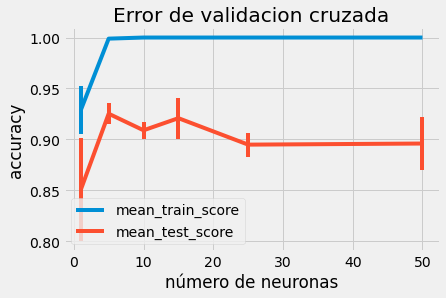

In [187]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [ ]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Escalar variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Ajustar el modelo
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)
y_pred  = classifier.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

print(cm)
print('\n','Acurracy=',(TP+TN)/(TP+TN+FP+FN)*100,'\n',
      'Precision=',TP/(TP+FP)*100,'\n',
      'Recall=',TP/(TP+FN)*100,'\n',
      'Specificity=',TN/(TN+FP)*100)